<center><h1> Calibration: Genetic Algorithm</h1></center>

### Imports

In [1]:
import pygad
import numpy
import ipynb.fs.full.ABM_pyGAD as ABM
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import math

### Figure Settings

In [2]:
import seaborn as sns
plt.rc('figure', figsize=(12, 8))
plt.rcParams['font.size'] = '18'
sns.set_style("ticks", {'font.family': 'Times New Roman'})
sns.set_palette("Paired")

## pyGAD

pyGAD package can be found here: https://pygad.readthedocs.io

### Fitness Function

In [3]:
def fitness_func(ga_instance, solution, solution_idx):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the difference between each input and its corresponding weight.
    
    agent_groups = {'Group1': [0.2, 0.01, 1.0]} #'Group2': [0.6, 0.01, 0.5]}
    
    agent_groups['Group1'][0], agent_groups['Group1'][1] = solution    
    
    model = ABM.Model(num_of_agents=1000, num_iterations=1000, agent_groups=agent_groups)
    model.run()
    
    s = model.dataset[800:]
    sample_2 = s.reset_index(drop=False, inplace=False)
    sample_2.rename(columns={sample_2.columns[1]: "num_infected" }, inplace = True)
    
    sample = sample_2['num_infected']
    
    result = distribution(sample, model)

    model_output = ABM.aveg_cdf
    fitness = -math.sqrt(mse(result, model_output))
    
    return fitness

In [4]:
def distribution(sample, model):
    x = numpy.arange(model.num_of_agents +2) -0.5
    hist, bin_edges = numpy.histogram(sample, x)
    cdf = numpy.cumsum(hist)/len(sample)
    #plt.plot(cdf, label="CDF")
    return (cdf)

In [5]:
# Number of Generations.
num_generations = 1000

# Number of Solutions to be selected as parents.
num_parents_mating = 1

# Number of solutions (i.e. chromosomes) within the population.
sol_per_pop = 10

# Number of genes in the solution/chromosome. 
num_genes = 2

# The parent selection type, sss: for  steady state  selection. 
parent_selection_type = "sss"

# Number of parents to keep in the current population,
# can't be less than -1, or greater than sol_per_pop.
keep_parents = 1

# The lower/higher value of the random range from which the gene values in the initial population are selected
init_range_low = 0
init_range_high= 1

# Type of the crossover operation. 
crossover_type = "single_point"

# Type of the mutation operation
mutation_type = "random"

# The probability of selecting a gene for applying the mutation operation. 
# Its value must be between 0.0 and 1.0 inclusive. 
# For each gene in a solution, a random value between 0.0 and 1.0 is generated. 
# If this random value is less than or equal to the value assigned to the,
# mutation_probability parameter, then the gene is selected.
mutation_probability = 0.5

# It is used to specify the possible values for each gene,
# in case the user wants to restrict the gene values
gene_space = [{'low': 0.0, 'high': 1.0}, {'low': 0.0, 'high': 0.1}]

In [6]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_func,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low = init_range_low,
                       init_range_high = init_range_high, 
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_probability=mutation_probability,
                       gene_space=gene_space,
                       save_solutions=True) #stop_criteria=["saturate_15"]
ga_instance.run()

/Users/deboraholukan/miniconda3/envs/pyabc/lib/python3.11/site-packages/pygad/pygad.py:1146: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.")


### Saving GA Solutions

In [14]:
ga_instance.save("pygad_GA-homo")

### Output

In [15]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Number of generations passed is {generations_completed}".format(generations_completed=ga_instance.generations_completed))

Parameters of the best solution : [0.08127901 0.0714802 ]
Fitness value of the best solution = -0.013768602891158768
Number of generations passed is 1000


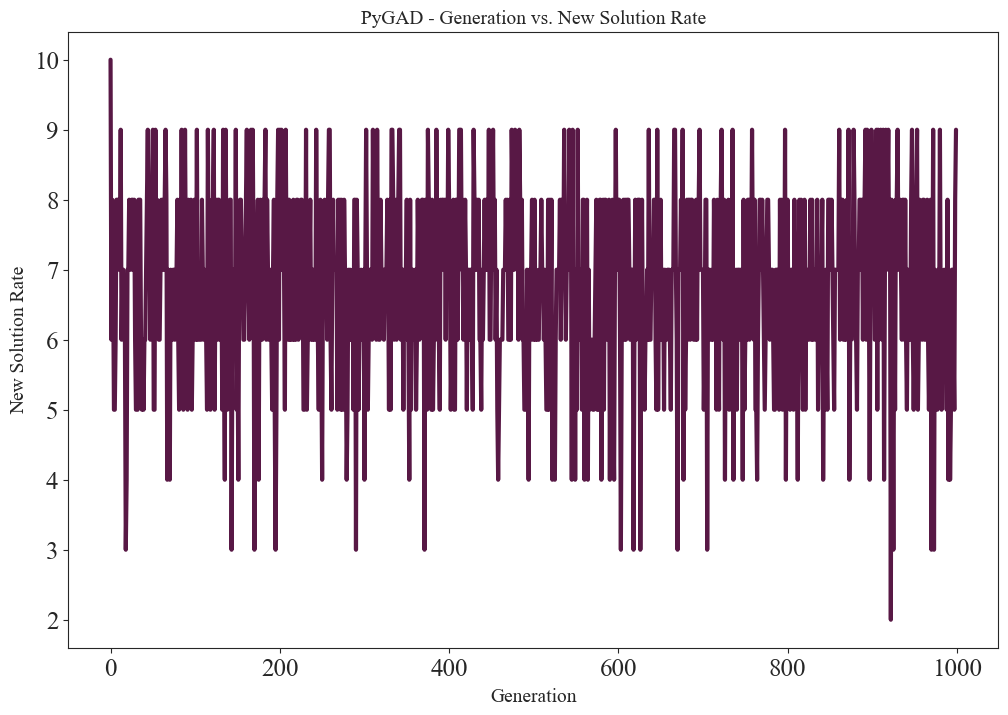

In [16]:
fig_5 = ga_instance.plot_new_solution_rate(color='#581845')
#fig_5.savefig("homo:new_sol1.png")

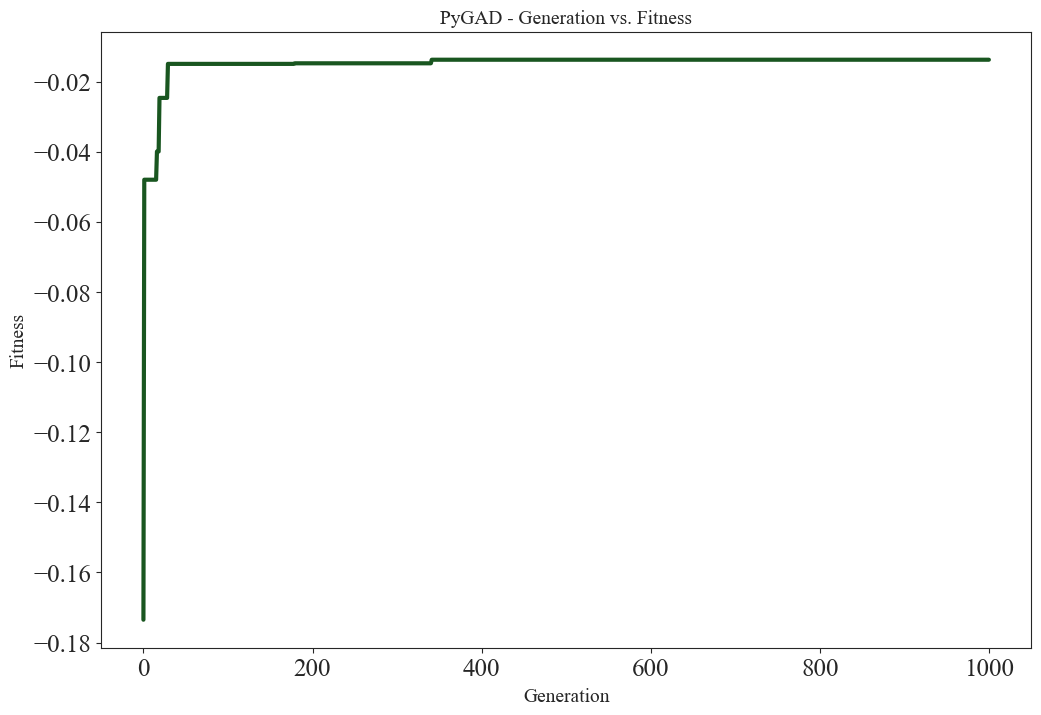

In [17]:
fig_3 = ga_instance.plot_fitness(color="#195620")
#fig_3.savefig("homo:fitness-plot1.png")

### Loading GA Solutions for Heterogeneous Configuration

In [20]:
load = pygad.load("pygad_GA-hetero") #To load heterogeneous file call: pygad_GA-hetero

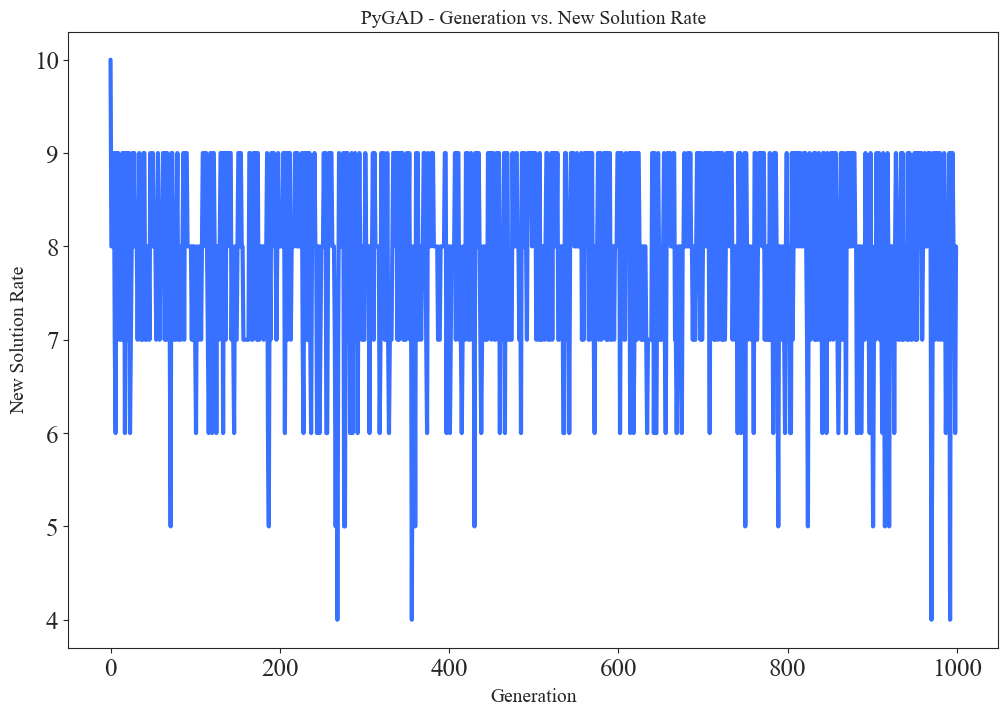

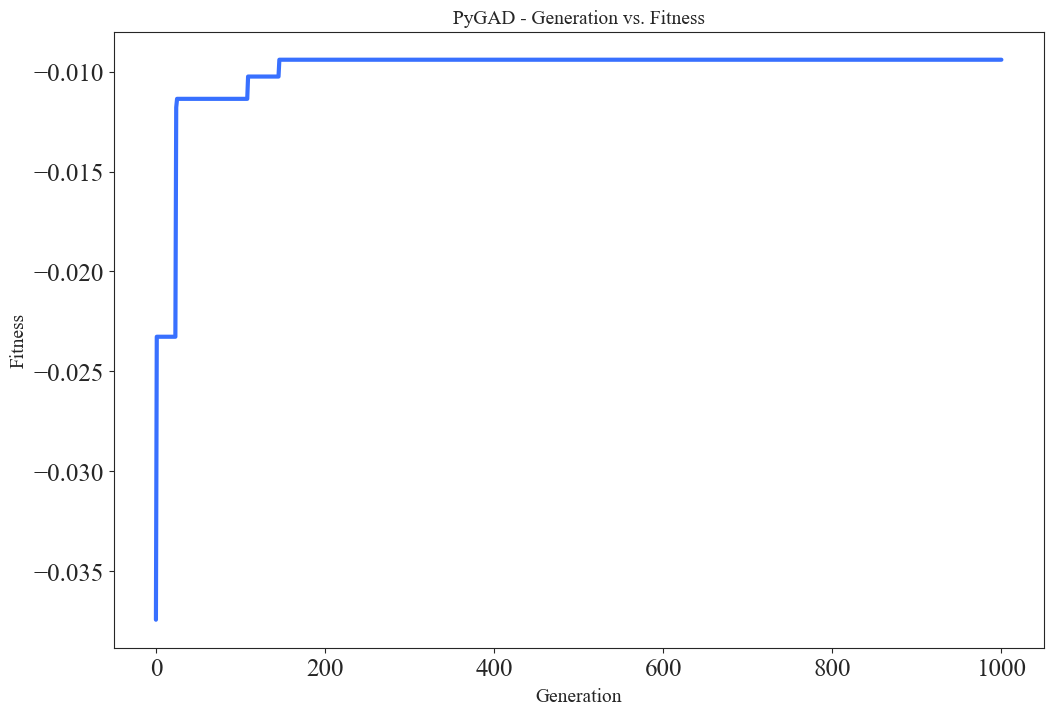

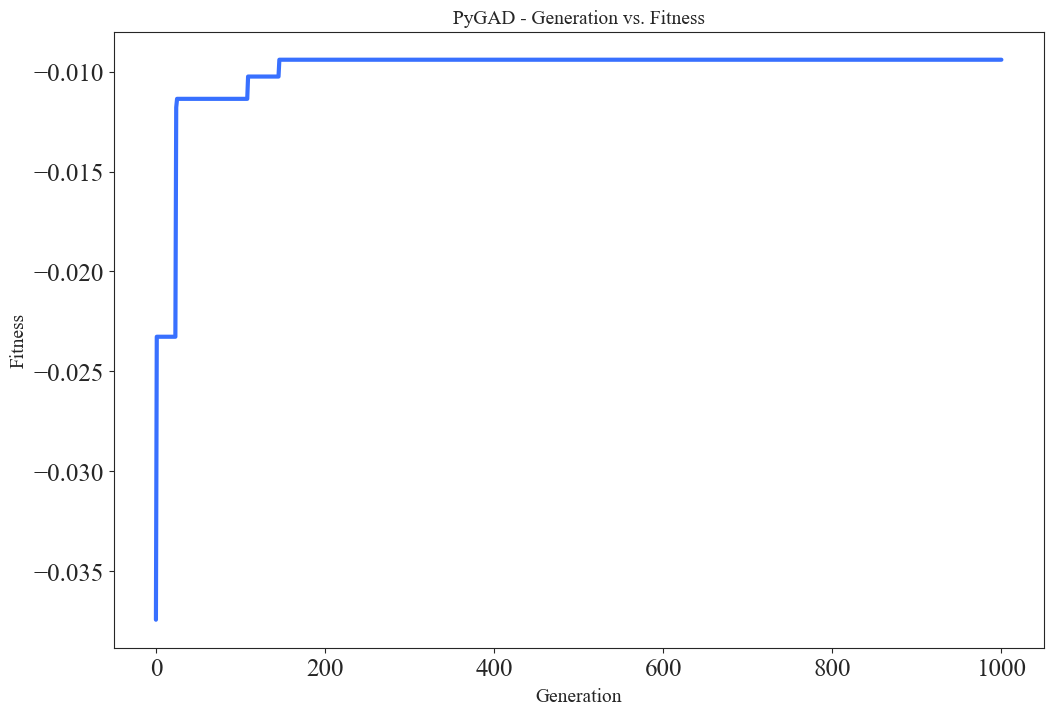

In [23]:
load.plot_new_solution_rate()
load.plot_fitness()